In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
precincts = gpd.read_file('../data/Police Precinct District Outlines (GIS).geojson')
print(precincts.crs)
precincts.head()

epsg:4326


precinct     shape_area      shape_len  \
0        CENTRAL  98541971.0257  46234.6717307   
1           EAST  562260180.986  90261.1338967   
2      HERMITAGE  2496337143.44  521944.947628   
3        MADISON  1913402934.01   254564.86409   
4  MIDTOWN-HILLS  1317030605.73  187104.273068   

                                            geometry  
0  MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ...  
1  MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ...  
2  MULTIPOLYGON (((-86.61306 36.24427, -86.61038 ...  
3  MULTIPOLYGON (((-86.74955 36.24047, -86.74977 ...  
4  MULTIPOLYGON (((-86.77935 36.14855, -86.77912 ...

In [3]:
resources = pd.read_csv('../data/Community_Resource_Information.csv')
print(resources.shape)
resources.head(3)

(548, 6)


Contact Type                     Contact    Street Address  \
0            GED/Education  Christian Women's Job Corp     18 8th Ave. S   
1  Transportation Services     TennCare transportation               NaN   
2                     Food   Preston Taylor Ministries  4014 Indiana Ave   

     Phone Number                       Notes  \
0  (615) 244-3669                  women only   
1  (615) 333-5445                         NaN   
2  (615) 596-4386  community food bank-pantry   

                                     Mapped location  
0                                                NaN  
1             Nashville, TN\n(36.166687, -86.779932)  
2  4014 Indiana Ave\nNashville, TN\n(36.157154, -...

In [4]:
type(precincts)

geopandas.geodataframe.GeoDataFrame

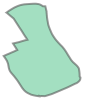

In [5]:
precincts.loc[0,'geometry']

In [6]:
print(precincts.loc[0,'geometry'])

MULTIPOLYGON (((-86.77524596288148 36.14894455629901, -86.77649210602664 36.14857687665805, -86.7781616274096 36.14865043038547, -86.77838512892765 36.14857286655733, -86.77853379143811 36.14852125124118, -86.77861081108503 36.14856586200554, -86.7790816946907 36.14871825277781, -86.77913112137387 36.14872947083355, -86.7791311513073 36.14872914156234, -86.77911998681444 36.14850955613429, -86.77934500767239 36.14854906263405, -86.78023330815216 36.14867254449707, -86.78103534916679 36.14881748465609, -86.7819350783633 36.14901057418182, -86.78290019974413 36.14926707446858, -86.78403804736715 36.14981240036976, -86.78447965199213 36.15002333651708, -86.78457729772377 36.15008440121774, -86.78517567838756 36.15045422265658, -86.78554657230615 36.15072753371399, -86.7860612634401 36.15119299961817, -86.7860921940855 36.15122095575138, -86.78616548052857 36.15128451286918, -86.78623595571774 36.15137215215066, -86.78653778557329 36.15173024561498, -86.78712021975099 36.15246752893453, -8

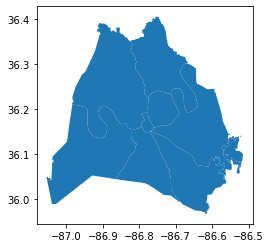

In [7]:
precincts.plot();

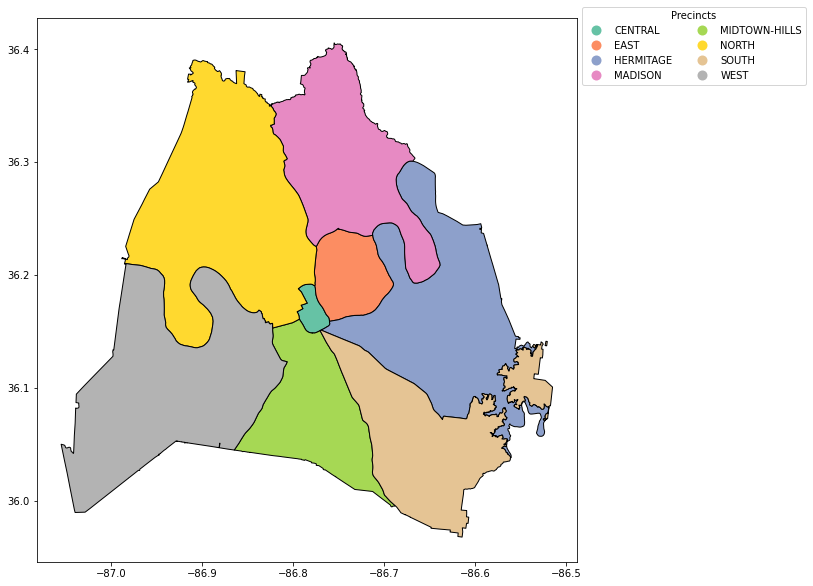

In [8]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Precincts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

precincts.plot(column = 'precinct', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [9]:
### Function from jumpstart (building_permits - Week 3 #26) to pull out lat/lng from 'mapped' column

In [10]:
# def add_lat_lng(df):
#     lat_lng = pd.DataFrame(df['Mapped location'].apply(
#         lambda s: s[s.find("(")+1:s.find(")")].split(', ')))
#     lat_lng_df = lat_lng['Mapped location'].apply(pd.Series)
#     lat_lng_df.columns = ['lat', 'lng']
#     df = pd.concat([df, lat_lng_df], axis = 1)
#     df = df[pd.to_numeric(df['lat'], errors='coerce').notnull()]
#     return df

In [11]:
# resources = resources.fillna(value = 'missing')

In [12]:
# resources_clean = add_lat_lng(resources)

In [13]:
resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Contact Type     548 non-null    object
 1   Contact          548 non-null    object
 2   Street Address   421 non-null    object
 3   Phone Number     538 non-null    object
 4   Notes            318 non-null    object
 5   Mapped location  495 non-null    object
dtypes: object(6)
memory usage: 25.8+ KB


In [14]:
lat_long = resources['Mapped location'].str.split('\n').str[2].str[1:-1].str.split(', ', expand=True)
resources = pd.concat([resources,lat_long],axis=1)

In [15]:
resources.head(2)

Contact Type                     Contact Street Address  \
0            GED/Education  Christian Women's Job Corp  18 8th Ave. S   
1  Transportation Services     TennCare transportation            NaN   

     Phone Number       Notes                         Mapped location    0  \
0  (615) 244-3669  women only                                     NaN  NaN   
1  (615) 333-5445         NaN  Nashville, TN\n(36.166687, -86.779932)  NaN   

     1  
0  NaN  
1  NaN

In [16]:
resources.columns

Index([   'Contact Type',         'Contact',  'Street Address',
          'Phone Number',           'Notes', 'Mapped location',
                       0,                 1],
      dtype='object')

In [17]:
resources.rename(columns = {0:'lat', 1:'lng'}, inplace = True) 

In [18]:
resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Contact Type     548 non-null    object
 1   Contact          548 non-null    object
 2   Street Address   421 non-null    object
 3   Phone Number     538 non-null    object
 4   Notes            318 non-null    object
 5   Mapped location  495 non-null    object
 6   lat              365 non-null    object
 7   lng              365 non-null    object
dtypes: object(8)
memory usage: 34.4+ KB


In [19]:
resources.head(2)

Contact Type                     Contact Street Address  \
0            GED/Education  Christian Women's Job Corp  18 8th Ave. S   
1  Transportation Services     TennCare transportation            NaN   

     Phone Number       Notes                         Mapped location  lat  \
0  (615) 244-3669  women only                                     NaN  NaN   
1  (615) 333-5445         NaN  Nashville, TN\n(36.166687, -86.779932)  NaN   

   lng  
0  NaN  
1  NaN

In [20]:
resources = resources.astype({'lat':float, 'lng':float})
resources.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Contact Type     548 non-null    object 
 1   Contact          548 non-null    object 
 2   Street Address   421 non-null    object 
 3   Phone Number     538 non-null    object 
 4   Notes            318 non-null    object 
 5   Mapped location  495 non-null    object 
 6   lat              365 non-null    float64
 7   lng              365 non-null    float64
dtypes: float64(2), object(6)
memory usage: 34.4+ KB


In [21]:
resources['geometry'] = resources.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
resources.head(3)

Contact Type                     Contact    Street Address  \
0            GED/Education  Christian Women's Job Corp     18 8th Ave. S   
1  Transportation Services     TennCare transportation               NaN   
2                     Food   Preston Taylor Ministries  4014 Indiana Ave   

     Phone Number                       Notes  \
0  (615) 244-3669                  women only   
1  (615) 333-5445                         NaN   
2  (615) 596-4386  community food bank-pantry   

                                     Mapped location        lat        lng  \
0                                                NaN        NaN        NaN   
1             Nashville, TN\n(36.166687, -86.779932)        NaN        NaN   
2  4014 Indiana Ave\nNashville, TN\n(36.157154, -...  36.157154 -86.835331   

                       geometry  
0               POINT (nan nan)  
1               POINT (nan nan)  
2  POINT (-86.835331 36.157154)

In [22]:
precincts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
resources_geo = gpd.GeoDataFrame(resources, 
                           crs = precincts.crs, 
                           geometry = resources['geometry'])

In [24]:
type(resources_geo)

geopandas.geodataframe.GeoDataFrame

In [25]:
precincts.head(2)

precinct     shape_area      shape_len  \
0  CENTRAL  98541971.0257  46234.6717307   
1     EAST  562260180.986  90261.1338967   

                                            geometry  
0  MULTIPOLYGON (((-86.77525 36.14894, -86.77649 ...  
1  MULTIPOLYGON (((-86.74977 36.24057, -86.74955 ...

In [26]:
resources_by_precincts = gpd.sjoin(resources_geo, precincts, op = 'within')

In [27]:
resources_by_precincts.head(3)

Contact Type                                 Contact  \
2                         Food               Preston Taylor Ministries   
14  Rent/Mortgage/Utility Help                  Jewish Family Services   
44              Medical/Dental  Cross Point Dream Center Dental Clinic   

                       Street Address    Phone Number  \
2                    4014 Indiana Ave  (615) 596-4386   
14  801 Percy Warner Blvd., Suite 103  (615) 354-1644   
44                 4007 Delaware Ave.  (615) 942-5559   

                         Notes  \
2   community food bank-pantry   
14        Jewish families only   
44                         NaN   

                                      Mapped location        lat        lng  \
2   4014 Indiana Ave\nNashville, TN\n(36.157154, -...  36.157154 -86.835331   
14  801 Percy Warner Blvd., Suite 103\nNashville, ...  36.083640 -86.890320   
44  4007 Delaware Ave.\nNashville, TN\n(36.154998,...  36.154998 -86.835885   

                      geometry  index_right precinct     shape_area  \
2   POINT (-86.83533 36.15715)            7     WEST  3037053503.78   
14  POINT (-86.89032 36.08364)            7     WEST  3037053503.78   
44  POINT (-86.83589 36.15500)            7     WEST  3037053503.78   

        shape_len  
2   319947.055426  
14  319947.055426  
44  319947.055426

In [28]:
resources_by_precincts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 351 entries, 2 to 516
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Contact Type     351 non-null    object  
 1   Contact          351 non-null    object  
 2   Street Address   351 non-null    object  
 3   Phone Number     349 non-null    object  
 4   Notes            216 non-null    object  
 5   Mapped location  351 non-null    object  
 6   lat              351 non-null    float64 
 7   lng              351 non-null    float64 
 8   geometry         351 non-null    geometry
 9   index_right      351 non-null    int64   
 10  precinct         351 non-null    object  
 11  shape_area       351 non-null    object  
 12  shape_len        351 non-null    object  
dtypes: float64(2), geometry(1), int64(1), object(9)
memory usage: 38.4+ KB


In [29]:
resources_by_precincts['precinct'].value_counts()

MIDTOWN-HILLS    87
NORTH            65
EAST             48
CENTRAL          47
SOUTH            44
WEST             36
HERMITAGE        16
MADISON           8
Name: precinct, dtype: int64

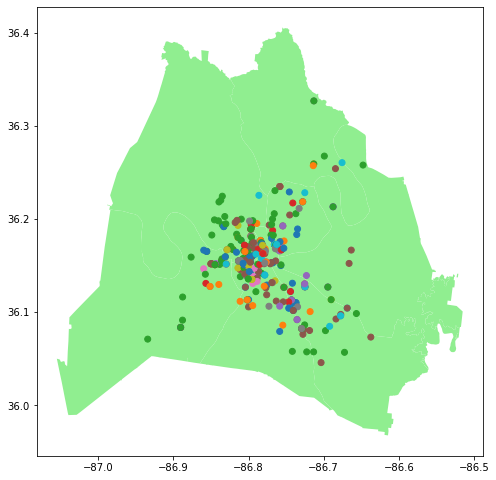

In [30]:
ax = precincts.plot(figsize = (8, 10), color = 'lightgreen')
resources_by_precincts.plot( ax = ax, column = 'Contact Type');
plt.show();

In [31]:
precincts.geometry.centroid

<ipython-input-31-1aa35c8ac199>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  precincts.geometry.centroid


0    POINT (-86.77888 36.16793)
1    POINT (-86.73801 36.19984)
2    POINT (-86.63656 36.16463)
3    POINT (-86.74077 36.29954)
4    POINT (-86.77745 36.07746)
5    POINT (-86.87461 36.25565)
6    POINT (-86.64764 36.05903)
7    POINT (-86.93664 36.10266)
dtype: geometry

In [32]:
center = precincts.geometry.centroid[0]
print(center)

POINT (-86.77887932264129 36.16793097386704)


<ipython-input-32-94ac193e72a0>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = precincts.geometry.centroid[0]


In [33]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.16793097386704, -86.77887932264129]


In [34]:
#create our map of Nashville and show it
map_nash = folium.Map(location =  area_center, zoom_start = 11)
map_nash

In [35]:
i = 0
for row_index, row_values in resources_by_precincts.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 2
values are:
 
Contact Type                                                    Food
Contact                                    Preston Taylor Ministries
Street Address                                      4014 Indiana Ave
Phone Number                                          (615) 596-4386
Notes                                     community food bank-pantry
Mapped location    4014 Indiana Ave\nNashville, TN\n(36.157154, -...
lat                                                        36.157154
lng                                                       -86.835331
geometry                                POINT (-86.835331 36.157154)
index_right                                                        7
precinct                                                        WEST
shape_area                                             3037053503.78
shape_len                                              319947.055426
Name: 2, dtype: object
------------------------- 
index is 14
values are:
 
Co

In [36]:
#draw our zip code area: 37207
map_nash = folium.Map(location =  area_center, zoom_start = 11)

folium.GeoJson(precincts).add_to(map_nash)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in resources_by_precincts.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Contact Type'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon)
home_marker = folium.Marker(
        location = [36.253159,-86.7447576], 
        popup = 'home', icon = folium.Icon(color="red",icon="home", prefix='fa'))    
home_marker.add_to(map_nash)

marker.add_to(map_nash)
map_nash.save('../maps/map_nash.html')

#display our map
map_nash

In [37]:
#folium.Map?

In [38]:
cluster_map_nash = folium.Map(location =  area_center, zoom_start = 11)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_nash)

folium.GeoJson(precincts).add_to(cluster_map_nash)

# inside the loop add each marker to the cluster
for row_index, row_values in resources_by_precincts.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Contact Type']+':<br />'+row_values['Contact']+':<br />'+row_values['Street Address'])#+': '+row_values['Notes'])#+row_values['Phone Number'])
    icon=folium.Icon(color="blue",icon="heart", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_nash.save('../maps/cluster_nash.html')

cluster_map_nash

#popup = row['station_number'] + ': ' + row['address']

In [39]:
resources_by_precincts['Contact Type'].value_counts()

Food                          63
Children's Services           36
Medical/Dental                34
GED/Education                 26
Counseling                    21
Job Training                  21
Rehab - Drug/Alcohol          19
ESL Classes                   16
Rent/Mortgage/Utility Help    15
Clothing                      12
Immigrant/Refugee             11
Teen Services                 10
Housing                        9
Crisis Info Resources          9
Legal Assistance               8
Senior/Disabled Housing        8
Transportation Services        6
Students                       6
Men's Resources                5
Childcare                      5
Christmas                      4
Tax Prep                       2
Pet Resources                  2
Health Insurance               2
Phone                          1
Name: Contact Type, dtype: int64

In [40]:
resources_by_precincts.dtypes

Contact Type         object
Contact              object
Street Address       object
Phone Number         object
Notes                object
Mapped location      object
lat                 float64
lng                 float64
geometry           geometry
index_right           int64
precinct             object
shape_area           object
shape_len            object
dtype: object

In [41]:
# Did not use this code for categorize 'Contact Type' into 4 items in 'type'

# # for i in resources_by_precincts:
# if resources_by_precincts.loc[resources_by_precincts['Contact Type'].isin(health),'type'] = 'health'
# elif resources_by_precincts.loc[resources_by_precincts['Contact Type'].isin(finance),'type'] = 'finance'
# elif resources_by_precincts.loc[resources_by_precincts['Contact Type'].isin(kids),'type'] = 'kids'
# elif resources_by_precincts.loc[resources_by_precincts['Contact Type'].isin(education),'type'] = 'education'
# else:
#     resources_by_precincts.loc[resources_by_precincts['Contact Type'],'type'] = 'other'

# resources_by_precincts['Type'] = resources_by_precincts.apply(func, axis=1)

# if resources_by_precincts['Contact Type'].isin(['health']):
#     return 'health'

# resources_by_precincts.loc[resources_by_precincts['Contact Type'].isin(health),'type'] = 'health'

In [42]:
health = ['Food', 'Medical/Dental', 'Counseling', 'Rehab - Drug/Alcohol', 'Clothing', 'Crisis Info Resources', 'Men\'s Resources', 'Health Insurance']
finance = ['Rent/Mortgage/Utility Help', 'Immigrant/Refugee', 'Housing', 'Senior/Disabled Housing', 'Legal Assistance', 'Transportation Services', 'Christmas', 'Tax Prep', 'Pet Resources', 'Phone']
kids = ['Children\'s Services']
education = ['GED/Education', 'Job Training', 'ESL Classes', 'Teen Services', 'Students', 'Childcare']

In [43]:
def get_type(contact):
    if contact in health:
        return 'health'
    elif contact in finance:
        return 'finance'
    elif contact in kids:
        return 'kids'
    elif contact in education:
        return 'education'
    else:
        return 'other'

In [44]:
resources_by_precincts['type'] = resources_by_precincts['Contact Type'].apply(get_type)

In [45]:
resources_by_precincts.head(2)

Contact Type                    Contact  \
2                         Food  Preston Taylor Ministries   
14  Rent/Mortgage/Utility Help     Jewish Family Services   

                       Street Address    Phone Number  \
2                    4014 Indiana Ave  (615) 596-4386   
14  801 Percy Warner Blvd., Suite 103  (615) 354-1644   

                         Notes  \
2   community food bank-pantry   
14        Jewish families only   

                                      Mapped location        lat        lng  \
2   4014 Indiana Ave\nNashville, TN\n(36.157154, -...  36.157154 -86.835331   
14  801 Percy Warner Blvd., Suite 103\nNashville, ...  36.083640 -86.890320   

                      geometry  index_right precinct     shape_area  \
2   POINT (-86.83533 36.15715)            7     WEST  3037053503.78   
14  POINT (-86.89032 36.08364)            7     WEST  3037053503.78   

        shape_len     type  
2   319947.055426   health  
14  319947.055426  finance

In [46]:
 def get_icon(type):
    if type == 'health':
        return folium.Icon(color="red",icon="heartbeat", prefix='fa')
    elif type == 'finance':
        return folium.Icon(color="green",icon="usd", prefix='fa')
    elif type == 'kids':
        return folium.Icon(color="blue",icon="child", prefix='fa')
    elif type == 'education':
        return folium.Icon(color="orange",icon="graduation-cap", prefix='fa')
    else:
        return folium.Icon(color="black",icon="question", prefix='fa')
        

In [47]:
cluster_map_nash2 = folium.Map(location =  area_center, zoom_start = 11)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_nash2)

folium.GeoJson(precincts).add_to(cluster_map_nash2)

# inside the loop add each marker to the cluster
for row_index, row_values in resources_by_precincts.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['precinct']+':<br />'+row_values['type']+':<br />'+row_values['Contact Type']+':<br />'+row_values['Contact']+':<br />'+row_values['Street Address'])#+': '+row_values['Notes'])#+row_values['Phone Number'])
    icon = get_icon(row_values['type'])
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
        icon = icon
    ) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_nash2.save('../maps/cluster_nash2.html')

cluster_map_nash2

In [48]:
# print(resources_by_precincts.precinct.value_counts())

In [49]:
# midtown_hills = resources_by_precincts[resources_by_precincts['precinct'] == 'MIDTOWN-HILLS']
# mh_count = midtown_hills['type'].value_counts()
# north = resources_by_precincts[resources_by_precincts['precinct'] == 'NORTH']
# n_count = north['type'].value_counts()
# east = resources_by_precincts[resources_by_precincts['precinct'] == 'EAST']
# e_count = east['type'].value_counts()
# central = resources_by_precincts[resources_by_precincts['precinct'] == 'CENTRAL']
# c_count = central['type'].value_counts()
# south = resources_by_precincts[resources_by_precincts['precinct'] == 'SOUTH']
# s_count = south['type'].value_counts()
# west = resources_by_precincts[resources_by_precincts['precinct'] == 'WEST']
# w_count = west['type'].value_counts()
# hermitage = resources_by_precincts[resources_by_precincts['precinct'] == 'HERMITAGE']
# h_count = hermitage['type'].value_counts()
# madison = resources_by_precincts[resources_by_precincts['precinct'] == 'MADISON']
# m_count = madison['type'].value_counts()

# print("Midtown Hills\n", mh_count)
# print("---")
# print("North\n", n_count)
# print("---")
# print("East\n", e_count)
# print("---")
# print("Central\n", c_count)
# print("---")
# print("South\n", s_count)
# print("---")
# print("West\n", e_count)
# print("---")
# print("Hermitage\n", w_count)
# print("---")
# print("Madison\n", h_count)